# House Price Prediction

In [17]:
#lets import the libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('tableau-colorblind10')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy import linalg as LA

Load and explore the data

In [18]:
#Importing the data
from sklearn.datasets import load_boston
dataset=load_boston()
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
'''
#converting the dataset to pandas dataframe
df=pd.DataFrame(np.concatenate((dataset.data, dataset.target.reshape(-1,1)),axis=1), columns= np.append(dataset.feature_names,'Price'))
df.head()
'''
#converting the dataset to pandas dataframe
df=pd.DataFrame(dataset.data, columns= dataset.feature_names)
df['Price']=dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
#find missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

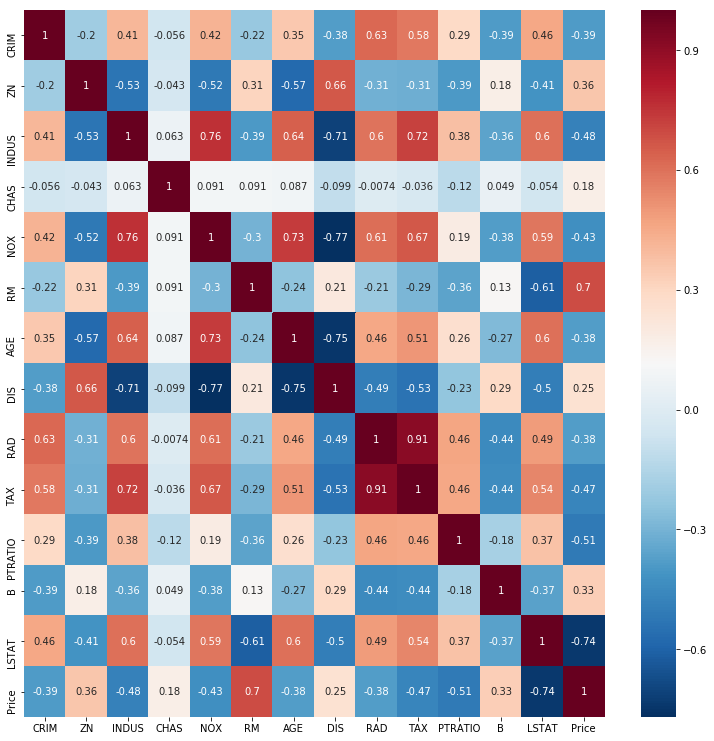

In [22]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)

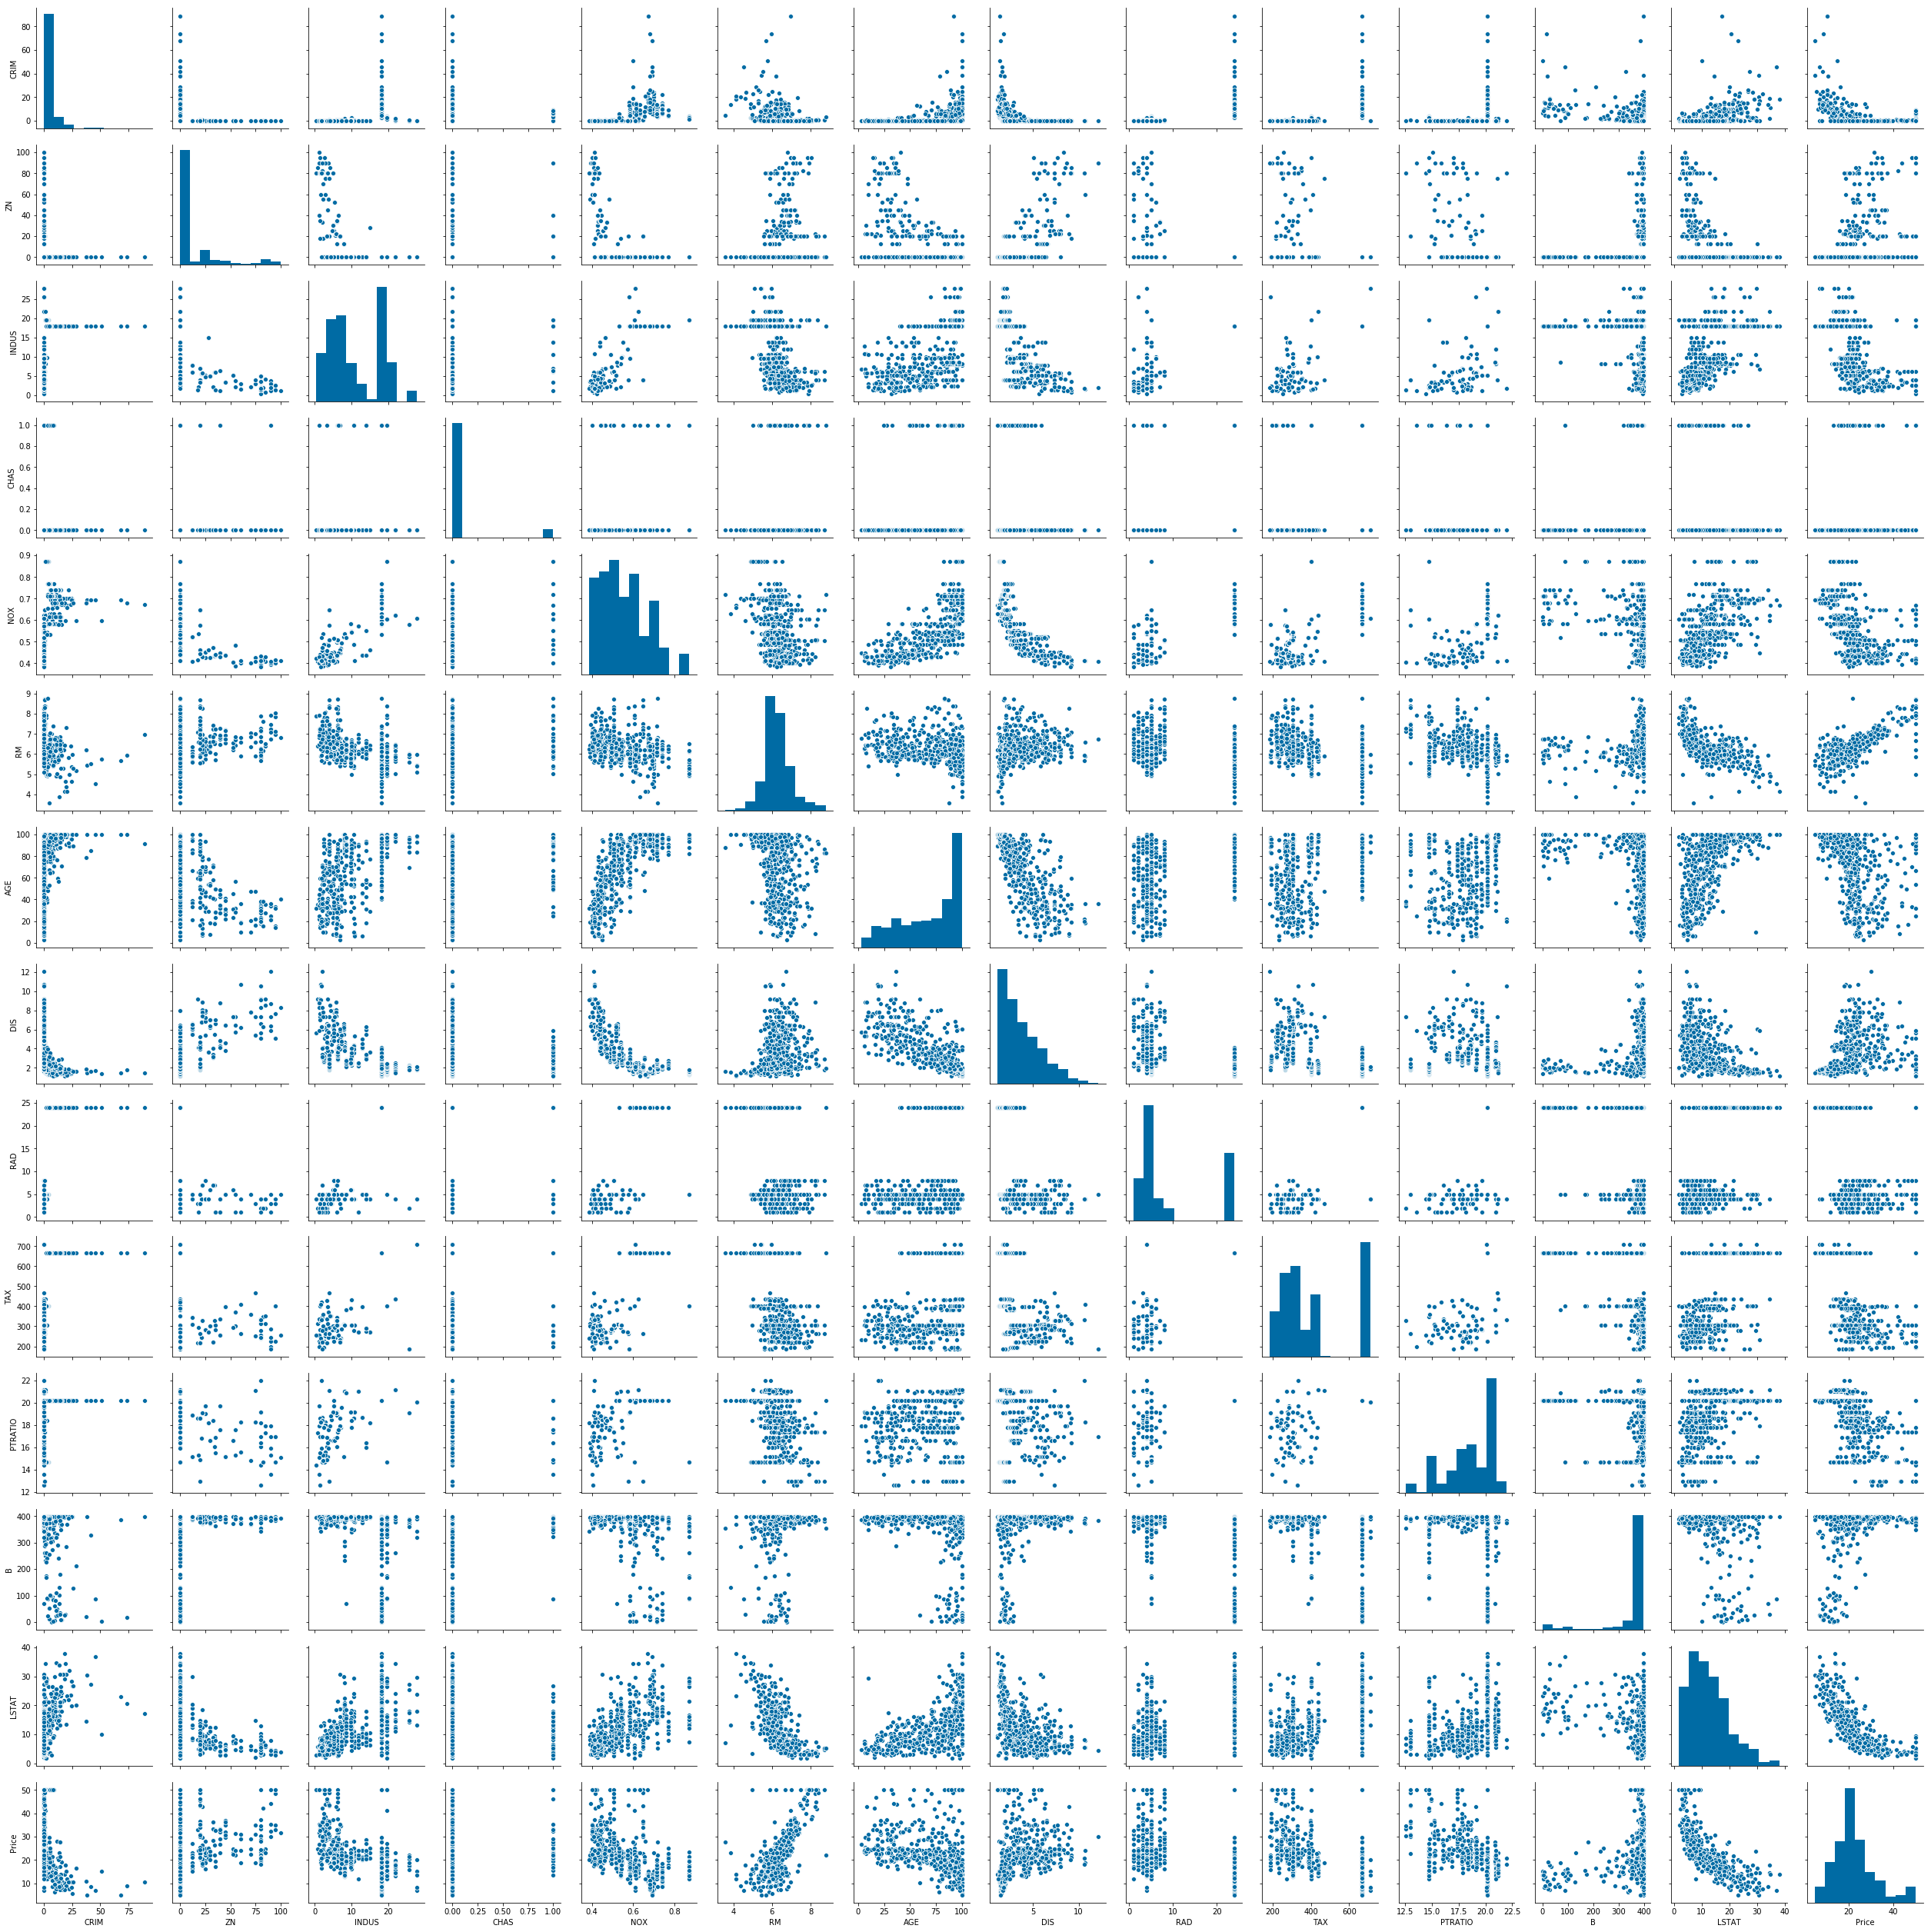

In [23]:
sns.pairplot(df)

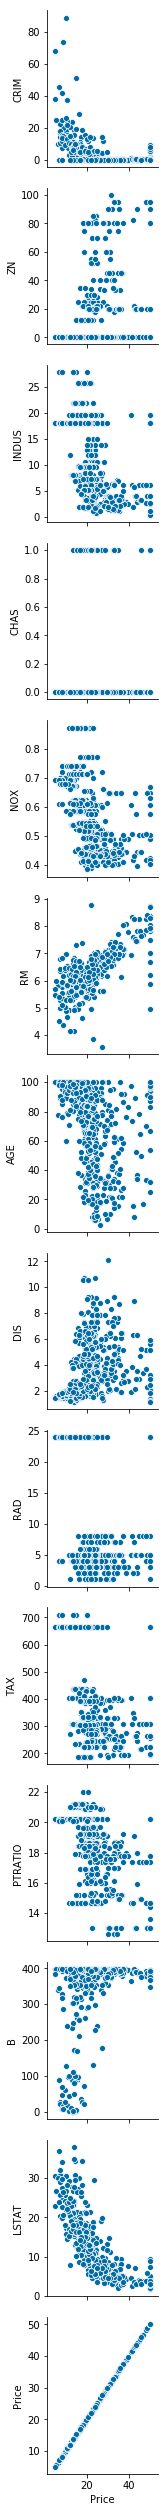

In [24]:
sns.pairplot(df, y_vars= df.columns, x_vars=['Price'])

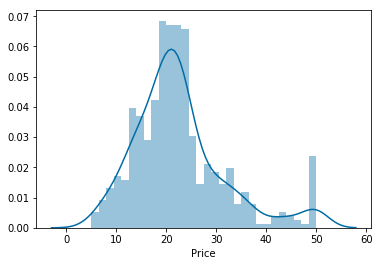

In [25]:
sns.distplot(df.Price,bins=30)   #price

In [26]:
#defining features and a target
x=df.iloc[:,0:13]
y=df.Price

In [27]:
#split the data into train and test sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size= 0.3, random_state= 21)

Building the pipeline

In [28]:
#Standardize features by removing the mean and scaling to unit variance
scaler=StandardScaler()

In [29]:
#defining the regressor
lr= LinearRegression()

In [30]:
#building the pipeline
pipeline = Pipeline([('scaler', scaler), ('lr', lr)])

Model Training 

In [31]:
model=pipeline.fit(x_train,y_train)

MAE =  3.6141140709296287
MSE =  27.579046610355373
RMSE =  5.251575631213491
% error =  30.18953634812112


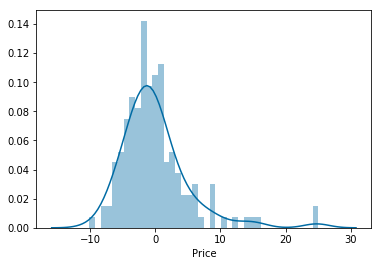

In [33]:
#model evaluation on the validation set
predicts = model.predict(x_valid)

#metrics
print('MAE = ', metrics.mean_absolute_error(y_valid,predicts))
print('MSE = ', metrics.mean_squared_error(y_valid,predicts))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_valid,predicts)))
print('% error = ', np.sqrt(metrics.mean_squared_error(y_valid,predicts))/np.sqrt(LA.norm(y_valid,2))*100)

sns.distplot((y_valid-predicts),bins=40)